# Analysis and Querying:

These are the symbols that will be dropped:  []
These are the remaining symbols:  ['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'instalment', 'grade', 'sub_grade', 'employment_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_date', 'loan_status', 'payment_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_date', 'last_payment_amount', 'next_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type']
id : Non-nulls: 54231 Non-Null Percentage: 100.0 %
member_id : Non-nulls: 54231 Non-Null Percentage: 100.0 %
loan_amount : Non-nulls: 54231 Non-Null Perc

<Axes: >

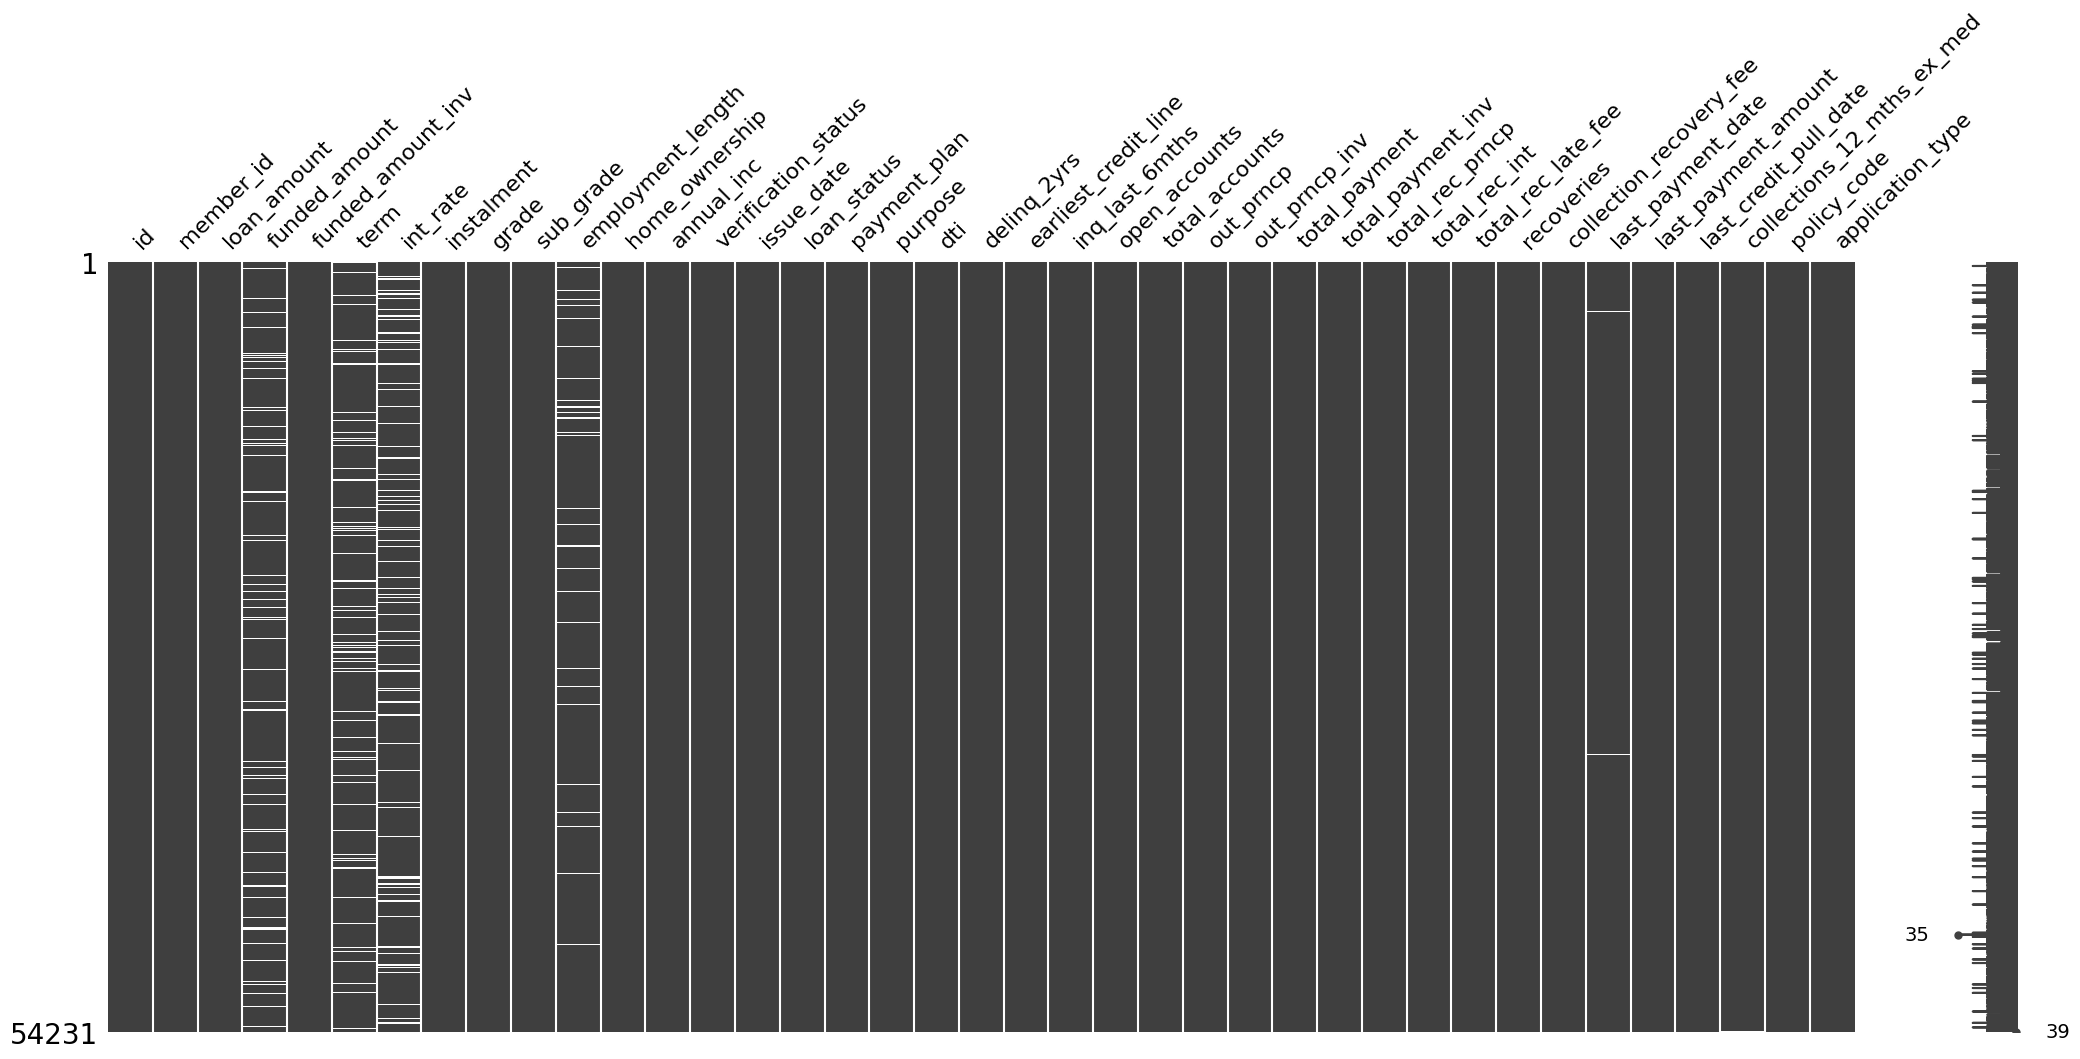

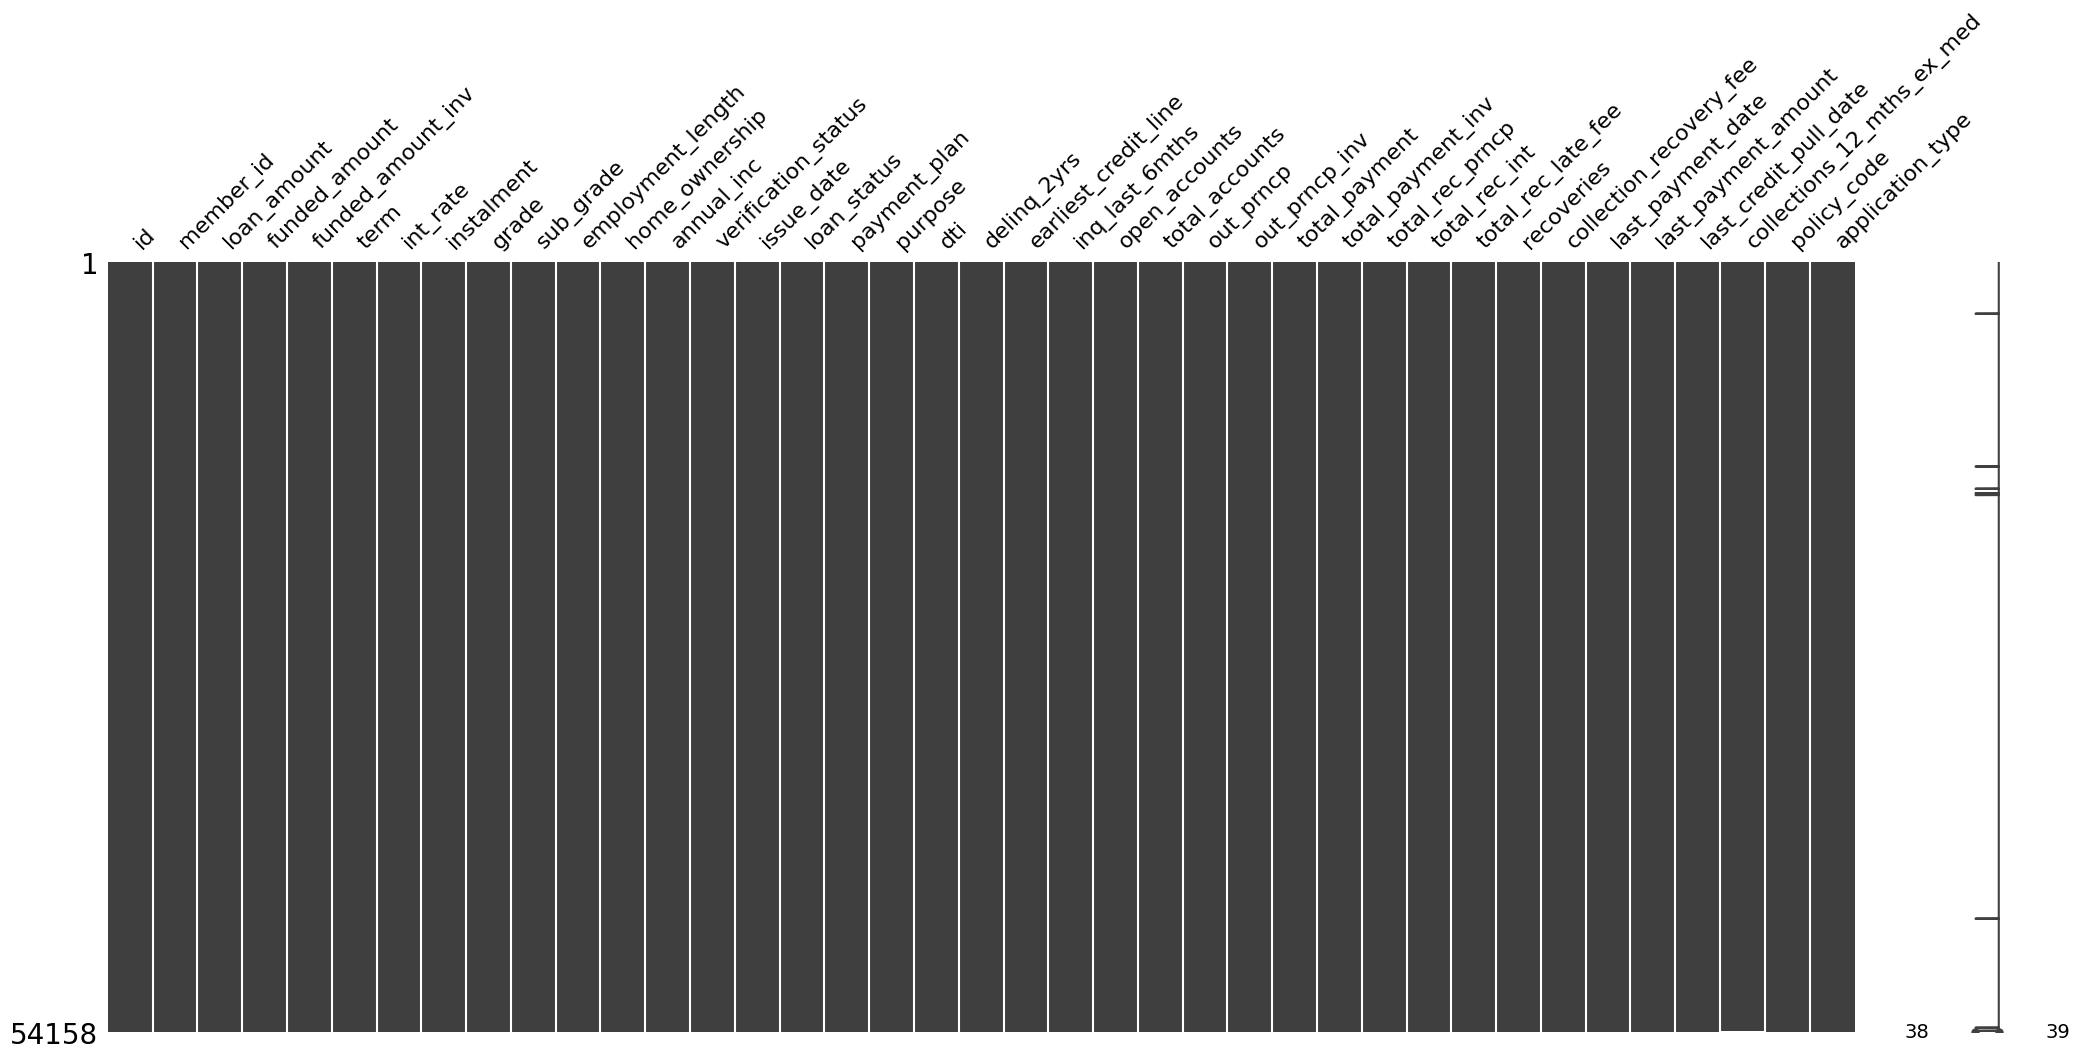

In [1]:
from db_utils import RDSDatabaseConnector
RDS = RDSDatabaseConnector()
from db_utils import DataTransform
DT = DataTransform()
from db_utils import DataFrameInfo
DFI = DataFrameInfo()
from db_utils import amount_of_nulls_and_column_drop
import missingno as msno
from db_utils import DataFrameTransform
DFT = DataFrameTransform()

#var2 = RDS.initialise_engine_and_extract_data()
#var3 = RDS.save_dataframe_to_csv()

df = RDS.load_dataframe_from_csv()

'''prints column names
#column_names = []
#for i in df:
#    column_names.append(i)
#print(column_names)'''

symbols = str(input('separate by spaces which columns are to be dropped: ')).split()
list_of_to_categorical = ['term','grade','sub_grade', 'employment_length','home_ownership','verification_status','loan_status','payment_plan','purpose','delinq_2yrs','application_type']
list_of_to_boolean = ['policy_code']
list_of_to_float = []
list_of_to_int = []
dates_to_convert = ['issue_date','earliest_credit_line','last_payment_date','next_payment_date','last_credit_pull_date']

df = DT.excess_symbol_removal(df, symbols)
df = DT.to_categorical(df, list_of_to_categorical)
df = DT.to_boolean(df, list_of_to_boolean)
df = DT.to_float(df, list_of_to_float)
df = DT.to_int(df, list_of_to_int)
df = DT.convert_dates_to_proper_format(df, dates_to_convert)

'''DataFrameInfo class method execution.
df = DFI.describe_all_columns_to_check_their_datatypes(df)
df = DFI.extract_statistical_values_median_stddev_mean_from_cols_and_dataframe(df)
df = DFI.count_distinct_values_in_categorical_columns(df)
df = DFI.print_out_the_shape_of_the_dataframe(df)
df = DFI.generate_a_count_slash_percentage_count_of_NULL_values_in_each_column(df)'''

df = amount_of_nulls_and_column_drop(df)

msno.matrix(df)
df = DFT.impute(df)

df = amount_of_nulls_and_column_drop(df)
msno.matrix(df)
#df['id'].fillna()
#df["funded_amount"] = df["funded_amount"].fillna(df["loan_amount"].mean)
# Also after review I found that null rows can be removed by using dropna
#and then using some sort of subset to specify the columns

<h3>(0) - Load the column names</h3>

<h3>(1) - Removal of symbols </h3>

<h3>(2) - Numerical to Categorical</h3>

<h3>(3) - Numerical to Boolean</h3>

<h3>(4) - Categorical to Boolean</h3>

<h3>(5) - int to float</h3>

<h3>(6) - float to int</h3>

<h3>(7) - Convert Dates to Proper Format</h3>

<h3>(8) - Describe all columns to check their datatypes</h3>

<h3>(9) - extract statistical values median stddev mean from cols and dataframe</h3>

<h3>(10) - Count distinct values in categorical columns</h3>

<h3>(11) - print out the shape of the dataframe</h3>

<h3>(12) - Generate a count slash percentage count of null values in each column</h3>

<h3>(13) - </h3>